In [494]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pickle
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

maturity = 7

In [495]:
countries= ['Belgium','Bulgaria','Czechia','Denmark','Germany', 'Estonia','Ireland','Greece',
       'Spain','France','Croatia','Italy','Cyprus','Latvia','Lithuania','Luxembourg','Hungary',
       'Netherlands','Austria','Poland','Portugal', 'Romania','Slovenia','Slovakia','Finland',
       'Sweden']

In [496]:
T0 = 2000
T1 = 2022

for filename in os.listdir("Data"):
    if filename.endswith(".csv"): 
        file_path = os.path.join("Data", filename)  
        key = filename.replace(".csv", "") 
        print(key)
        df = pd.read_csv(file_path, delimiter=';')
        if len(df.columns) < 2:
            df = pd.read_csv(file_path, delimiter=',')
        globals()[key] = df[(df.iloc[:, 0] >= T0) & (df.iloc[:, 0] <= T1)]

GDP_fix
GDP_fix_copy
Revenue
Growth
Interest_Rates
GDP_copy
Debt
Interest
Expenditure
GDP


In [497]:
Revenue
Expenditure
Interest

,Time,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland
0,2000,6.7,4.1,0.8,3.7,3.2,0.3,1.9,6.9,3.2,...,3.0,3.0,3.9,2.4,4.0,2.7,3.3,6.9,1.6,1.7
1,2001,6.6,4.2,0.9,3.4,3.0,0.2,1.4,6.3,3.0,...,3.1,3.0,3.4,2.3,4.0,2.6,2.7,9.3,2.0,1.5
2,2002,5.8,2.2,1.1,3.1,3.0,0.3,1.3,5.6,2.6,...,2.9,2.8,2.5,2.2,3.6,2.0,2.9,5.6,1.8,1.5
3,2003,5.4,2.2,1.0,2.8,2.9,0.2,1.2,4.9,2.3,...,3.0,2.7,1.6,1.9,2.5,1.8,2.1,6.4,1.8,1.3
4,2004,4.9,1.8,1.1,2.5,2.8,0.2,1.1,4.8,2.0,...,2.7,2.6,1.5,1.7,2.2,1.7,1.9,6.4,1.5,1.3
5,2005,4.4,1.6,1.1,2.1,2.8,0.2,1.0,4.7,1.7,...,2.5,2.6,1.2,1.5,1.7,1.6,1.8,5.5,1.6,1.3
6,2006,4.1,1.3,1.0,1.8,2.7,0.2,1.0,4.4,1.6,...,2.4,2.8,0.8,1.4,1.5,1.5,1.8,6.2,2.4,1.2
7,2007,4.0,1.1,1.1,1.6,2.7,0.2,1.0,4.5,1.6,...,2.2,3.0,0.7,1.2,1.4,1.4,1.7,6.3,2.6,1.1
8,2008,4.0,0.8,1.0,1.4,2.7,0.2,1.3,4.8,1.6,...,2.1,3.1,0.8,1.1,1.3,1.4,1.6,11.6,2.0,1.0
9,2009,3.9,0.7,1.2,1.9,2.6,0.2,2.0,5.0,1.7,...,2.5,3.0,2.0,1.3,1.5,1.3,1.3,12.1,1.3,0.9


In [498]:
Primary_Surplus = Revenue - (Expenditure-Interest)
Primary_Surplus

,Time,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland
0,2000,6.6,4.2,-2.700000e+00,5.6,1.6,0.2,6.7,2.9,2.0,...,-1.0,-0.3,-0.7,-1.2,-8.7,9.6,6.4,8.4,16.6,2.0
1,2001,6.8,4.9,-4.800000e+00,4.6,0.0,0.4,2.3,0.8,2.6,...,-1.6,-1.8,0.0,-2.1,-3.2,7.6,4.1,9.0,15.2,1.7
2,2002,5.8,1.1,-5.300000e+00,3.1,-0.9,0.7,0.8,-0.4,2.3,...,-1.9,-0.5,0.6,-0.2,-4.6,6.0,1.5,3.3,10.8,-0.3
3,2003,3.6,2.1,-5.800000e+00,2.7,-0.8,2.0,1.5,-2.9,1.9,...,-3.0,-3.0,0.2,-0.7,-0.6,4.3,0.9,4.1,9.0,-0.1
4,2004,4.7,3.6,-1.200000e+00,4.6,-0.5,2.6,2.4,-4.0,1.9,...,-2.4,-3.6,0.4,-0.2,-0.1,3.9,2.1,6.7,12.3,-0.1
5,2005,1.6,3.3,-2.000000e+00,7.1,-0.5,1.3,2.6,-1.5,2.9,...,-1.4,-3.6,0.4,0.2,-1.1,4.3,3.6,10.5,16.4,0.6
6,2006,4.3,3.9,-1.200000e+00,6.8,1.1,3.1,3.7,-1.5,3.8,...,-1.2,-1.3,-1.3,0.2,-2.1,5.4,3.9,12.7,20.3,2.0
7,2007,4.0,1.1,5.000000e-01,6.6,3.0,3.0,1.3,-2.2,3.4,...,0.3,0.1,-2.0,1.2,-0.7,6.5,5.0,11.9,19.6,2.6
8,2008,2.9,2.2,-1.000000e+00,4.6,2.6,-2.5,-5.8,-5.3,-2.9,...,-1.5,-0.6,-4.6,-0.3,-1.2,5.6,3.5,-0.6,20.6,2.9
9,2009,-1.6,-3.8,-4.300000e+00,-0.9,-0.6,-2.0,-11.9,-10.2,-9.5,...,-4.7,-6.8,-7.5,-4.6,-6.6,-1.2,0.5,3.5,11.5,1.4


In [499]:
Primary_Surplus_x = Primary_Surplus[countries[0]]
Primary_Surplus_x[0]

6.600000000000001

In [500]:
max(average_3[countries[i]].values())

4.166666666666669

In [ ]:
Revenue = Revenue/100
Growth=Growth/100
Debt=Debt
Interest=Interest/100
Expenditure=Expenditure/100
GDP = GDP # GDP (løb) eller GDP_fix (fast)
GDP_small_sample = GDP_copy # GDP_copy (løb) eller GDP_fix_copy (fast)

# GDP = GDP_fix # GDP (løb) eller GDP_fix (fast)
# GDP_small_sample = GDP_fix_copy # GDP_copy (løb) eller GDP_fix_copy (fast)

Interest_rates = Interest_Rates

$$\begin{align*}
\texttt{tsy}_{i,t}&=\frac{\texttt{total\_gov\_revenue}_{i,t}}{\texttt{gdp}_{i,t}}\\\\
\texttt{gsy}_{i,t}&=\frac{\texttt{total\_gov\_exp}_{i,t}-\texttt{interests}_{i,t}}{\texttt{gdp}_{i,t}} \\\\
\texttt{dsy}_{i,t}&=\texttt{tsy}_{i,t}-\texttt{gsy}_{i,t}
\end{align*}$$

In [ ]:
len(Interest_rates["Maturity"])
Maturity_list = Interest_rates["Maturity"]
Interest_rates.columns = range(Interest_rates.shape[1])

In [ ]:
n = len(countries)
tsy = {}  
gsy = {}
dsy = {}
ismpl = {}
mt = {}

for i in range(n):
    tsy[countries[i]] = Revenue[countries[i]] 
    tsy[countries[i]].index = Revenue["Time"]

    gsy[countries[i]] = (Expenditure[countries[i]] - Interest[countries[i]])
    gsy[countries[i]].index = Revenue["Time"]

    dsy[countries[i]] = tsy[countries[i]]-gsy[countries[i]]
    dsy[countries[i]].index = Revenue["Time"]

In [ ]:
# mt = 0
# for i in range(n):
#     mt=mt+np.mean(tsy[countries[i]])/n

mt
x = {}
alpha = {}

for i in range(n):
    x[countries[i]] = np.sum((tsy[countries[i]]-gsy[countries[i]])/len(tsy[countries[i]]))
    #print(x[countries[i]])

# for i in range(n):
#     alpha = np.mean(x[countries[i]])


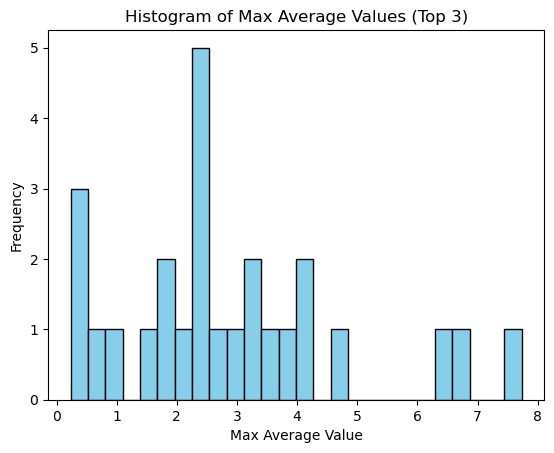

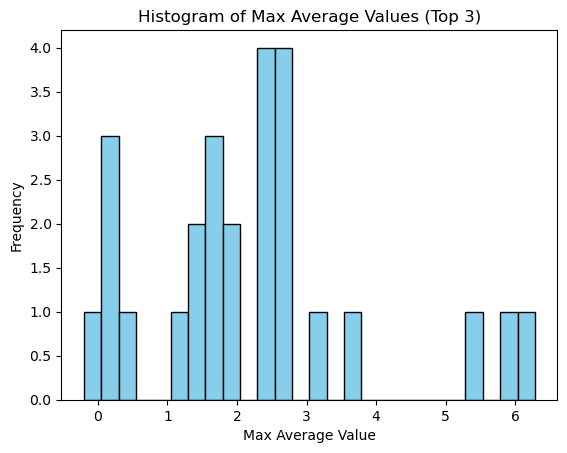

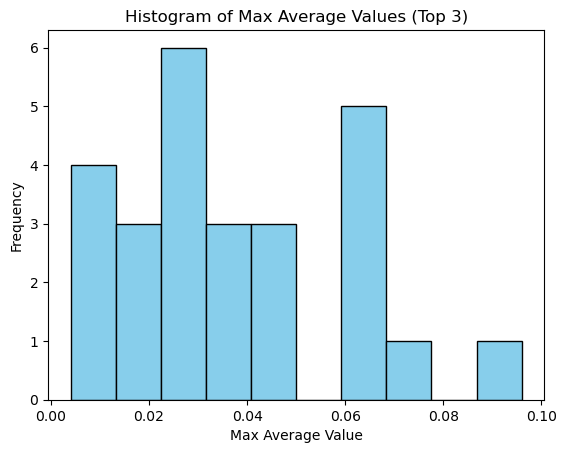

[0.09599999999999997,
 0.07100000000000006,
 0.068,
 0.067,
 0.06400000000000006,
 0.06,
 0.05999999999999994,
 0.04899999999999993,
 0.044999999999999984,
 0.04300000000000004,
 0.038000000000000034,
 0.03699999999999998,
 0.032000000000000084,
 0.031000000000000028,
 0.030999999999999972,
 0.030000000000000082,
 0.029000000000000026,
 0.027000000000000024,
 0.022999999999999965,
 0.02200000000000002,
 0.016000000000000014,
 0.01599999999999996,
 0.012000000000000066,
 0.01100000000000001,
 0.010000000000000009,
 0.0040000000000000036]

In [514]:
average_3={}
average_5={}
max_average_3 = {}
max_average_5 = {}

for i in range(0,len(countries)):
    Primary_Surplus_x = Primary_Surplus[countries[i]]
    average_3[countries[i]]={}
    average_5[countries[i]]={}

    for j in range(0,len(Primary_Surplus)-2):
        average_3[countries[i]][j] = (Primary_Surplus_x[j]+Primary_Surplus_x[j+1]+Primary_Surplus_x[j+2])/3
    
    for j in range(0,len(Primary_Surplus)-5):
        average_5[countries[i]][j] = (Primary_Surplus_x[j]+Primary_Surplus_x[j+1]+Primary_Surplus_x[j+2]+Primary_Surplus_x[j+3]+Primary_Surplus_x[j+4])/5

for i in range(0,len(countries)):
    max_average_3[countries[i]] = max(average_3[countries[i]].values())
    max_average_5[countries[i]] = max(average_5[countries[i]].values())


max_average_3 = sorted(max_average_3.values(), reverse=True)


plt.hist(max_average_3, bins=26, color='skyblue', edgecolor='black')
plt.xlabel('Max Average Value')
plt.ylabel('Frequency')
plt.title('Histogram of Max Average Values (Top 3)')
plt.show()


max_average_5 = sorted(max_average_5.values(), reverse=True)

plt.hist(max_average_5, bins=26, color='skyblue', edgecolor='black')
plt.xlabel('Max Average Value')
plt.ylabel('Frequency')
plt.title('Histogram of Max Average Values (Top 3)')
plt.show()

max_1={}
for i in range(0,len(countries)):
    max_1[countries[i]] = max(dsy[countries[i]])


max_1 = sorted(max_1.values(), reverse=True)

plt.hist(max_1, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Max Average Value')
plt.ylabel('Frequency')
plt.title('Histogram of Max Average Values (Top 3)')
plt.show()

max_1

$$\begin{align*}
\texttt{ALP1}_{i}&=\max_t\big(\texttt{dsy}_{i,t}\big)=\max_t\big(\texttt{tsy}_{i,t}-\texttt{gsy}_{i,t}\big)=\max_t\Bigg(\frac{\texttt{total\_gov\_revenue}_{i,t}}{\texttt{gdp}_{i,t}}-\frac{\texttt{total\_gov\_exp}_{i,t}-\texttt{interests}_{i,t}}{\texttt{gdp}_{i,t}}\Bigg)\\\\
\texttt{ALP2}_{i}&=\max_t\big(\texttt{tsy}_{i,t}\big)=\Bigg(\frac{\texttt{total\_gov\_revenue}_{i,t}}{\texttt{gdp}_{i,t}}\Bigg)\\\\
\texttt{ALP3}_{i}&=\frac{1}{t}\sum^T_{t=1}\big(\texttt{dsy}_{i,t}\big)=\frac{1}{t}\sum^T_{t=1}\big(\texttt{tsy}_{i,t}-\texttt{gsy}_{i,t}\big)=\frac{1}{t}\sum^T_{t=1} \Bigg(\frac{\texttt{total\_gov\_revenue}_{i,t}}{\texttt{gdp}_{i,t}}-\frac{\texttt{total\_gov\_exp}_{i,t}-\texttt{interests}_{i,t}}{\texttt{gdp}_{i,t}}\Bigg)
\end{align*}
$$

In [ ]:
ALP1 = {}
ALP2 = {}
ALP3 = {}
ALP4 = {}
ALP5 = {}
ALP6 = {}
print_plots = False

for i in range(n):
    ALP1[countries[i]] = max(dsy[countries[i]].dropna())
    
    ALP2[countries[i]] = max(tsy[countries[i]].dropna()) - min(gsy[countries[i]].dropna())
    
    ALP3[countries[i]] = np.mean(dsy[countries[i]].dropna())
    
    ALP4[countries[i]] = dsy[countries[i]]
    
    ALP5[countries[i]] = dsy[countries[i]].dropna().quantile(0.80)
    
    cycle, trend = sm.tsa.filters.hpfilter(dsy[countries[i]].dropna(), lamb=3)

    ALP6[countries[i]] = ((trend)).rename(countries[i])

    if print_plots == True:
        plt.figure(figsize=(10, 5))
        plt.plot(ALP6[countries[i]], label='HP', marker='o')
        plt.plot(ALP4[countries[i]], label='Faktisk', marker='x')
        plt.xlabel(f'{countries[i]}')
        plt.legend()
        plt.grid(True)
        plt.show()

$$\begin{align}
\texttt{ly}_{i,t}&=\log\left(\texttt{GDP}_{i,t}\right)\\\\
\texttt{dY}_{i,t}&=\Delta \log\left(\texttt{GDP}_{i,t}\right)=\log\left(\texttt{GDP}_{i,t}\right)-\log\left(\texttt{GDP}_{i,t-1}\right)
\end{align}$$

In [ ]:
ly = {}
dY = {}
MDY = {}
for i in range(n):
    ly[countries[i]] = np.log(GDP[countries[i]])
    dY[countries[i]] = ly[countries[i]].diff(1)

    MDY[countries[i]] = np.mean(dY[countries[i]])


$$\begin{align}
\texttt{dY}_t&=\rho\cdot \texttt{dY}_{t−1}+\varepsilon_t\\\\
\texttt{MDY}_{i}&=\frac{1}{n}\sum^T_{t=1} \texttt{dY}_{t,i}\\\\
\texttt{SE}_{i}&=\sqrt{\text{Var}(\hat{\rho}_i)}
\end{align}$$
 

In [ ]:
ly = {}
dY = {}
for i in range(n):
    ly[countries[i]] = np.log(GDP_small_sample[countries[i]].dropna().reset_index(drop=True))
    dY[countries[i]] = ly[countries[i]].diff(1)


In [ ]:

RHO = {}
SE = {}
res = {}
N   = 1000000
e = np.random.randn(maturity * N)
x = {}
x = {}
SY = {}

for i in range(n):
    model = sm.tsa.AutoReg(dY[countries[i]].dropna().reset_index(drop=True), lags=1)  
    result = model.fit()  
    res[countries[i]] = result

    RHO[countries[i]] = res[countries[i]].params.iloc[1]

    SE[countries[i]] = res[countries[i]].scale

    x[countries[i]] = np.std(res[countries[i]].resid) * e
    x[countries[i]] = np.sum(np.reshape(x[countries[i]], (maturity, N)), axis=0)
    x[countries[i]] = x[countries[i]].T

    SY[countries[i]] = np.std(x[countries[i]])


In [ ]:
mt = {}
BSY = {}

for i in range(n):
    BSY[countries[i]] = Debt[countries[i]]

    #BSY[countries[i]].index = Debt["Time"]
    #BSY[countries[i]] = daty[countries[i]]

In [ ]:
DY = {}
yy = {}
zz = {}

for i in range(n):
    #DY[countries[i]] = np.log(daty[countries[i]][1:]) - np.log(daty[countries[i]][:-1])
    DY[countries[i]] = np.log(GDP[countries[i]][1:].values) - np.log(GDP[countries[i]][:-1].values)
    #DY[countries[i]] = DY[countries[i]][:-1, :]

    DY[countries[i]] = DY[countries[i]].reshape(-1, 1) 
    DY[countries[i]] = DY[countries[i]][:-1, :]  

    DY[countries[i]] = [item[0] for item in DY[countries[i]]]

In [ ]:
with open('variabler.pkl', 'wb') as f:
    pickle.dump([countries, maturity, Interest_rates, ALP1, ALP2, ALP3, ALP4, ALP5, ALP6,  MDY, SY, RHO, SE, BSY, DY], f)